In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/content/drive/MyDrive/USA Housing Dataset.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [5]:
df.shape

(4140, 18)

In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [10]:
df["price"].value_counts()

,count
price,
0.0,49
300000.0,39
400000.0,28
450000.0,27
440000.0,27
...,...
305100.0,1
213400.0,1
831000.0,1


In [19]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Assuming 'x' and 'y' are already defined as in your original code:
x =df.iloc[:,2:]
y = df["price"]

# Identify columns with string (object) dtype
categorical_cols = x.select_dtypes(include=['object']).columns

# Create a LabelEncoder for each categorical column
encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    x[col] = encoders[col].fit_transform(x[col])  # Encode categorical values to numeric

# Now you can calculate the mutual information
score = mutual_info_regression(x, y)
score

array([0.05307759, 0.19748347, 0.32966562, 0.07858142, 0.05296394,
       0.00627749, 0.04690553, 0.00938294, 0.24783385, 0.06625576,
       0.05921232, 0.        , 0.02758232, 0.31449585, 0.40952957,
       0.00440916])

In [20]:
len(score)

16

In [21]:
len(x.columns)

16

In [23]:
imp_fea = pd.DataFrame(score,columns=["scores"])
imp_fea

,scores
0,0.053078
1,0.197483
2,0.329666
3,0.078581
4,0.052964
5,0.006277
6,0.046906
7,0.009383
8,0.247834
9,0.066256


In [25]:
df_columns =pd.DataFrame(df.columns,columns=["features"])
df_columns

,features
0,date
1,price
2,bedrooms
3,bathrooms
4,sqft_living
5,sqft_lot
6,floors
7,waterfront
8,view
9,condition


In [27]:
new_fea =pd.concat([imp_fea,df_columns],axis=1)
new_fea

,scores,features
0,0.053078,date
1,0.197483,price
2,0.329666,bedrooms
3,0.078581,bathrooms
4,0.052964,sqft_living
5,0.006277,sqft_lot
6,0.046906,floors
7,0.009383,waterfront
8,0.247834,view
9,0.066256,condition


In [28]:
#sort in descending order
new_fea.nlargest(16,columns="scores")

,scores,features
14,0.409530,street
2,0.329666,bedrooms
13,0.314496,yr_renovated
8,0.247834,view
1,0.197483,price
3,0.078581,bathrooms
9,0.066256,condition
10,0.059212,sqft_above
0,0.053078,date
4,0.052964,sqft_living


In [40]:
#lets select only 8 columns out of 20 using nlargest and specify column names to sort
new_fea=new_fea.nlargest(8,columns="scores")

<Axes: ylabel='features'>

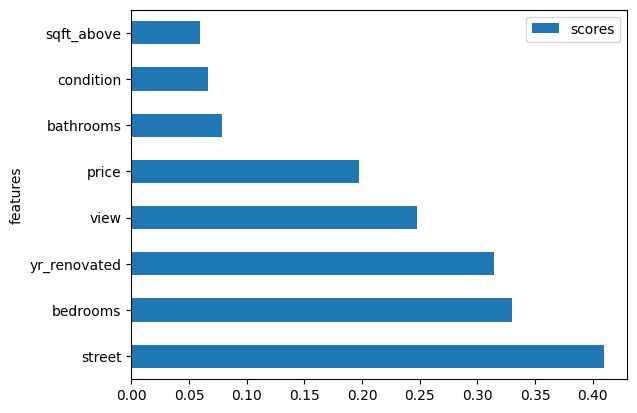

In [41]:
new_fea.plot(kind="barh",x="features",y="scores")

In [47]:
df=df.loc[:,new_fea["features"].values]
df.head()


,street,bedrooms,yr_renovated,view,price,bathrooms,condition,sqft_above
0,9245-9249 Fremont Ave N,3.0,0,0,376000.0,2.00,3,1340
1,33001 NE 24th St,4.0,0,0,800000.0,3.25,3,3540
2,7070 270th Pl SE,5.0,0,0,2238888.0,6.50,3,6420
3,820 NW 95th St,3.0,0,0,324000.0,2.25,3,798
4,10834 31st Ave SW,5.0,0,0,549900.0,2.75,5,1600


In [48]:
df["street"].value_counts()

,count
street,
2520 Mulberry Walk NE,4
2500 Mulberry Walk NE,3
14583 NE 58th St,2
14634 128th Ave NE,2
34115 SE Ash St,2
...,...
9007 4th Ave NW,1
21924 234th Ave SE,1
4612 92nd Ave NE,1


In [51]:
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()
lb

LabelEncoder()

In [53]:
df["street"]= lb.fit_transform(df["street"])
df.head()

,street,bedrooms,yr_renovated,view,price,bathrooms,condition,sqft_above
0,3962,3.0,0,0,376000.0,2.00,3,1340
1,2491,4.0,0,0,800000.0,3.25,3,3540
2,3511,5.0,0,0,2238888.0,6.50,3,6420
3,3762,3.0,0,0,324000.0,2.25,3,798
4,177,5.0,0,0,549900.0,2.75,5,1600


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
street,4140.0,2041.557971,1178.462071,0.0,1020.75,2040.50,3064.25,4078.00
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.00,8.00
yr_renovated,4140.0,808.368357,979.380535,0.0,0.00,0.00,1999.00,2014.00
view,4140.0,0.246618,0.790619,0.0,0.00,0.00,0.00,4.00
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.00,26590000.00
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.50,6.75
condition,4140.0,3.452415,0.678533,1.0,3.00,3.00,4.00,5.00
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.00,8020.00


In [68]:
#use MinMaxScaler to scale the data because its Regression problem
from sklearn.preprocessing import MinMaxScaler
mmsc =MinMaxScaler()
mmsc

MinMaxScaler()

In [73]:
norm = mmsc.fit_transform(df)
df = pd.DataFrame(df)
normdf = pd.DataFrame(norm, columns=df.columns)
normdf

,0,1,2,3,4,5,6,7
0,0.971555,0.375,0.000000,0.0,0.014141,0.296296,0.50,0.126797
1,0.610839,0.500,0.000000,0.0,0.030086,0.481481,0.50,0.414379
2,0.860961,0.625,0.000000,0.0,0.084200,0.962963,0.50,0.790850
3,0.922511,0.375,0.000000,0.0,0.012185,0.333333,0.50,0.055948
4,0.043404,0.625,0.000000,0.0,0.020681,0.407407,1.00,0.160784
...,...,...,...,...,...,...,...,...
4135,0.758950,0.375,0.982622,0.0,0.011590,0.259259,0.75,0.149020
4136,0.213340,0.375,0.997517,0.0,0.020095,0.370370,0.50,0.142484
4137,0.891123,0.375,0.000000,0.0,0.015679,0.370370,0.50,0.345098
4138,0.771211,0.500,0.000000,0.0,0.007649,0.296296,0.50,0.091503


In [75]:
normdf.iloc[:,:5].describe().T

,count,mean,std,min,25%,50%,75%,max
0,4140.0,0.500627,0.288980,0.0,0.250307,0.500368,0.751410,1.0
1,4140.0,0.425060,0.112992,0.0,0.375000,0.375000,0.500000,1.0
2,4140.0,0.401375,0.486286,0.0,0.000000,0.000000,0.992552,1.0
3,4140.0,0.061655,0.197655,0.0,0.000000,0.000000,0.000000,1.0
4,4140.0,0.020800,0.021951,0.0,0.012035,0.017300,0.024788,1.0


In [ ]:
#now our data is in scaled format so separate out the input and output


In [83]:
title = list(normdf.columns)
title[4],title[7]=title[7],title[4]
title


[0, 1, 2, 3, 7, 5, 6, 4]

In [91]:
normdf =normdf[title]
normdf.head()

,0,1,2,3,7,5,6,4
0,0.971555,0.375,0.0,0.0,0.126797,0.296296,0.5,0.014141
1,0.610839,0.500,0.0,0.0,0.414379,0.481481,0.5,0.030086
2,0.860961,0.625,0.0,0.0,0.790850,0.962963,0.5,0.084200
3,0.922511,0.375,0.0,0.0,0.055948,0.333333,0.5,0.012185
4,0.043404,0.625,0.0,0.0,0.160784,0.407407,1.0,0.020681


In [93]:
#separate out input and output
x = normdf.iloc[:,:-1]
x[:2]

,0,1,2,3,7,5,6
0,0.971555,0.375,0.0,0.0,0.126797,0.296296,0.5
1,0.610839,0.500,0.0,0.0,0.414379,0.481481,0.5


In [95]:
y =normdf[4]

In [96]:
y[:2]

,4
0,0.014141
1,0.030086


In [107]:
print(x.shape, y.shape)

(4140, 7) (4140,)


In [114]:
y = y.reshape(-1, 1)

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [120]:
#lets build a model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [122]:
#fit the model
model=lr.fit(x_train,y_train)
x_test[:2]

,0,1,2,3,7,5,6
435,0.825650,0.625,0.999503,0.0,0.381699,0.259259,0.5
986,0.431584,0.250,0.000000,0.0,0.128105,0.259259,0.5


In [124]:
#test the model
y_pred = lr.predict(x_test)
y_pred

array([[0.02681576],
       [0.01360947],
       [0.0178401 ],
       [0.01443934],
       [0.02666462],
       [0.01472752],
       [0.02266486],
       [0.03679443],
       [0.01342089],
       [0.02051463],
       [0.01650278],
       [0.01118183],
       [0.01573167],
       [0.0176463 ],
       [0.01726821],
       [0.02178615],
       [0.02898451],
       [0.02814398],
       [0.01010237],
       [0.01824755],
       [0.01312375],
       [0.01359529],
       [0.0202204 ],
       [0.03374491],
       [0.04020826],
       [0.01426037],
       [0.02551794],
       [0.0173308 ],
       [0.00791553],
       [0.01541494],
       [0.01184478],
       [0.01348374],
       [0.02495167],
       [0.00913954],
       [0.0252144 ],
       [0.02580415],
       [0.01134254],
       [0.01018476],
       [0.01634387],
       [0.02072903],
       [0.0126153 ],
       [0.02725693],
       [0.02619996],
       [0.02825772],
       [0.01858152],
       [0.02079535],
       [0.01687973],
       [0.013

In [126]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [128]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.007121763234354213

In [130]:
mse =mean_squared_error(y_test,y_pred)
mse

0.00017328360234780565

In [133]:
r2=r2_score(y_test,y_pred)*100
r2

41.63657212915507

**KNN Regressor**


In [134]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import precision_score,accuracy_score,f1_score,classification_report,confusion_matrix

In [135]:
knn =KNeighborsRegressor()
knn

KNeighborsRegressor()

In [138]:
model2=knn.fit(x_train,y_train)
model2

KNeighborsRegressor()

In [139]:
score = knn.score(x_train,y_train)*100

34.58846538415652

In [140]:
y_pred =knn.predict(x_test)


In [142]:
r2 = r2_score(y_test, y_pred)*100
r2

13.543368157055136

**Using Simple Vector Machine**

In [145]:
from sklearn.svm import SVR

In [146]:
model = SVR(kernel='linear')
model.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [147]:
#check data accuracy
model.score(x,y)*100

-1238.1477080193456